In [1]:
# Imports

import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Como não temos poder computacional para todos os 49 arquivos, vamos utilizar de amostras de 5 ou 10 arquivos.

In [2]:
def load_csv_files(directory, max_files=None):
    # Listando todos os arquivos no diretório especificado
    files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    
    # Se max_files for especificado, seleciona apenas os primeiros max_files arquivos
    if max_files:
        files = files[:max_files]
    
    # Lista para armazenar cada DataFrame lido
    dataframes = []
    
    # Carregando cada arquivo CSV e adicionando-o à lista de DataFrames
    for file in files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        dataframes.append(df)
        print(f"Carregado: {file}")
    
    # Concatenando todos os DataFrames em um único
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    return combined_df

# Exemplo de uso
directory = 'C:/Projeto Aplicado'
max_files = 5  # Número máximo de arquivos a serem lidos
df = load_csv_files(directory, max_files)

# Visualizando as primeiras linhas do DataFrame combinado
print(df.head())

C:\Users\wilso\AppData\Local\Temp\ipykernel_22460\2254181250.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Carregado: citi_bike_data_00000.csv


C:\Users\wilso\AppData\Local\Temp\ipykernel_22460\2254181250.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Carregado: citi_bike_data_00001.csv


C:\Users\wilso\AppData\Local\Temp\ipykernel_22460\2254181250.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Carregado: citi_bike_data_00002.csv


C:\Users\wilso\AppData\Local\Temp\ipykernel_22460\2254181250.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Carregado: citi_bike_data_00003.csv


C:\Users\wilso\AppData\Local\Temp\ipykernel_22460\2254181250.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Carregado: citi_bike_data_00004.csv
  station_id  num_bikes_available num_ebikes_available num_bikes_disabled  \
0       3195                   25                   \N                 \N   
1       3195                    5                   \N                 \N   
2       3483                   11                    0                  0   
3       3483                    7                    0                  3   
4       3483                    4                    0                  1   

   num_docks_available num_docks_disabled is_installed is_renting  \
0                   13                 \N           \N         \N   
1                   33                 \N           \N         \N   
2                    2                  1            1          1   
3                    4                  0            1          1   
4                    9                  0            1          1   

  is_returning  station_status_last_reported   station_name       lat  \
0           \

In [3]:
# Criando uma cópia do DataFrame original
df_backup = df.copy()

In [4]:
# Verificar o tipo de cada coluna
print(df.info())

# Exibir estatísticas descritivas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35039092 entries, 0 to 35039091
Data columns (total 18 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   station_id                        object
 1   num_bikes_available               int64 
 2   num_ebikes_available              object
 3   num_bikes_disabled                object
 4   num_docks_available               int64 
 5   num_docks_disabled                object
 6   is_installed                      object
 7   is_renting                        object
 8   is_returning                      object
 9   station_status_last_reported      int64 
 10  station_name                      object
 11  lat                               object
 12  lon                               object
 13  region_id                         object
 14  capacity                          object
 15  has_kiosk                         object
 16  station_information_last_updated  object
 17  missin

# Observamos que existe uma grande quantidade de dados. Existem mais de 73 milhões de linhas (73.499.594) e 18 colunas em apenas 10 arquivos. Não temos hardware o suficiente para analisarmos tudo de uma vez.

# Também observamos que algumas colunas estão com dados inconsistentes, tendo em vista que algumas estão em object, mas deveriam estar em valor numérico.

In [6]:
# Verificando se há valores ausentes
print(df.isnull().sum())

station_id                          0
num_bikes_available                 0
num_ebikes_available                0
num_bikes_disabled                  0
num_docks_available                 0
num_docks_disabled                  0
is_installed                        0
is_renting                          0
is_returning                        0
station_status_last_reported        0
station_name                        0
lat                                 0
lon                                 0
region_id                           0
capacity                            0
has_kiosk                           0
station_information_last_updated    0
missing_station_information         0
dtype: int64


# Não foram detectados valores ausentes, mas por verificação humana, vemos que há. Vamos corrigir isso e as observações anteriores. 

In [7]:
def clean_and_convert_types(df):
    # Converter colunas numéricas que estão como 'object'
    df['num_ebikes_available'] = pd.to_numeric(df['num_ebikes_available'], errors='coerce')
    df['num_bikes_disabled'] = pd.to_numeric(df['num_bikes_disabled'], errors='coerce')
    df['num_docks_disabled'] = pd.to_numeric(df['num_docks_disabled'], errors='coerce')
    df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
    df['lon'] = pd.to_numeric(df['lon'], errors='coerce')
    df['capacity'] = pd.to_numeric(df['capacity'], errors='coerce')

    # Converter colunas de status (is_installed, is_renting, is_returning) para booleanas
    df['is_installed'] = df['is_installed'].astype('bool')
    df['is_renting'] = df['is_renting'].astype('bool')
    df['is_returning'] = df['is_returning'].astype('bool')

    # Converter colunas de timestamps (POXIX/UNIX time) para datetime
    df['station_status_last_reported'] = pd.to_datetime(df['station_status_last_reported'], unit='s', errors='coerce')
    df['station_information_last_updated'] = pd.to_datetime(df['station_information_last_updated'], unit='s', errors='coerce')

    return df

# Limpeza e ajuste dos tipos de dados
df = clean_and_convert_types(df)

# Verificar as primeiras linhas
print(df.dtypes)
print(df.head())

C:\Users\wilso\AppData\Local\Temp\ipykernel_22460\4051585865.py:17: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['station_information_last_updated'] = pd.to_datetime(df['station_information_last_updated'], unit='s', errors='coerce')


station_id                                  object
num_bikes_available                          int64
num_ebikes_available                       float64
num_bikes_disabled                         float64
num_docks_available                          int64
num_docks_disabled                         float64
is_installed                                  bool
is_renting                                    bool
is_returning                                  bool
station_status_last_reported        datetime64[ns]
station_name                                object
lat                                        float64
lon                                        float64
region_id                                   object
capacity                                   float64
has_kiosk                                   object
station_information_last_updated    datetime64[ns]
missing_station_information                   bool
dtype: object
  station_id  num_bikes_available  num_ebikes_available  num_bikes_d

In [8]:
# Verificar o tipo de cada coluna
print(df.info())

# Exibir estatísticas descritivas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35039092 entries, 0 to 35039091
Data columns (total 18 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   station_id                        object        
 1   num_bikes_available               int64         
 2   num_ebikes_available              float64       
 3   num_bikes_disabled                float64       
 4   num_docks_available               int64         
 5   num_docks_disabled                float64       
 6   is_installed                      bool          
 7   is_renting                        bool          
 8   is_returning                      bool          
 9   station_status_last_reported      datetime64[ns]
 10  station_name                      object        
 11  lat                               float64       
 12  lon                               float64       
 13  region_id                         object        
 14  capacity        

In [10]:
# Verificando se há valores ausentes
print(df.isnull().sum())

station_id                                 0
num_bikes_available                        0
num_ebikes_available                27104599
num_bikes_disabled                  27104599
num_docks_available                        0
num_docks_disabled                  27104599
is_installed                               0
is_renting                                 0
is_returning                               0
station_status_last_reported               0
station_name                               0
lat                                 28494642
lon                                 28494642
region_id                                  0
capacity                            28494642
has_kiosk                                  0
station_information_last_updated    28494642
missing_station_information                0
dtype: int64


# A resposta anterior indica que existem muitos valores ausentes (NaN) nas colunas num_ebikes_available, num_bikes_disabled, num_docks_disabled, lat, lon, capacity e station_information_last_updated. Vamos identificar o percentual de dados ausentes, tratar esses dados e verificar novamente.

In [11]:
# Atualizando o backup
df_backup = df.copy()

In [12]:
# Calcular percentual de dados ausentes
percentuais_ausentes = df.isnull().mean() * 100
print("Percentual de dados ausentes por coluna:\n", percentuais_ausentes)

Percentual de dados ausentes por coluna:
 station_id                           0.000000
num_bikes_available                  0.000000
num_ebikes_available                77.355312
num_bikes_disabled                  77.355312
num_docks_available                  0.000000
num_docks_disabled                  77.355312
is_installed                         0.000000
is_renting                           0.000000
is_returning                         0.000000
station_status_last_reported         0.000000
station_name                         0.000000
lat                                 81.322433
lon                                 81.322433
region_id                            0.000000
capacity                            81.322433
has_kiosk                            0.000000
station_information_last_updated    81.322433
missing_station_information          0.000000
dtype: float64


In [13]:
# Preencher valores ausentes com zero
df.fillna(0, inplace=True)

In [14]:
# Verificar se ainda há dados ausentes
print(df.isnull().sum())

station_id                          0
num_bikes_available                 0
num_ebikes_available                0
num_bikes_disabled                  0
num_docks_available                 0
num_docks_disabled                  0
is_installed                        0
is_renting                          0
is_returning                        0
station_status_last_reported        0
station_name                        0
lat                                 0
lon                                 0
region_id                           0
capacity                            0
has_kiosk                           0
station_information_last_updated    0
missing_station_information         0
dtype: int64


# Identificando os dados ausentes e os substituindo por 0, seguiremos às análises.

In [15]:
# Atualizando o backup
df_backup = df.copy()

In [16]:
# Estatísticas descritivas das colunas numéricas
df.describe()

# Verificando valores únicos em colunas categóricas, como 'station_name' e 'region_id'
df['station_name'].value_counts()
df['region_id'].value_counts()

region_id
\N    28494642
71     6215412
70      329038
Name: count, dtype: int64

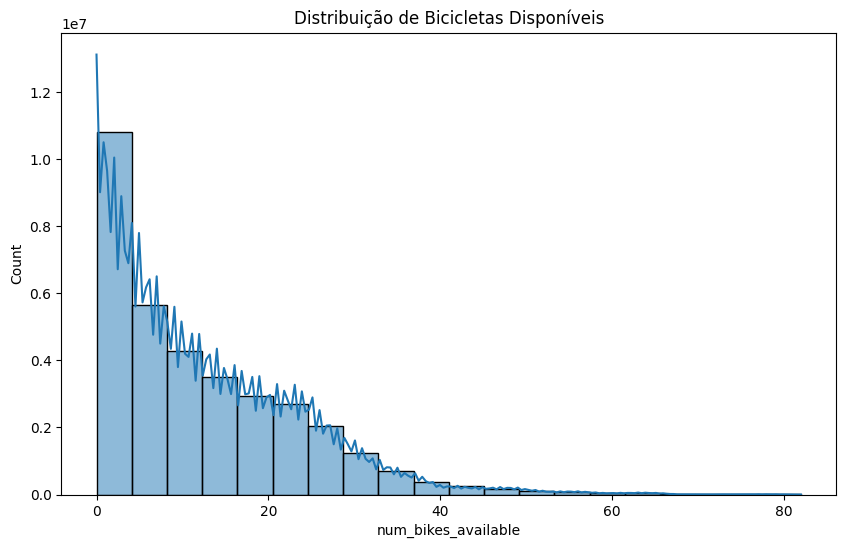

In [17]:
# Histograma de bicicletas disponíveis
plt.figure(figsize=(10, 6))
sns.histplot(df['num_bikes_available'], bins=20, kde=True)
plt.title('Distribuição de Bicicletas Disponíveis')
plt.show()

C:\Users\wilso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


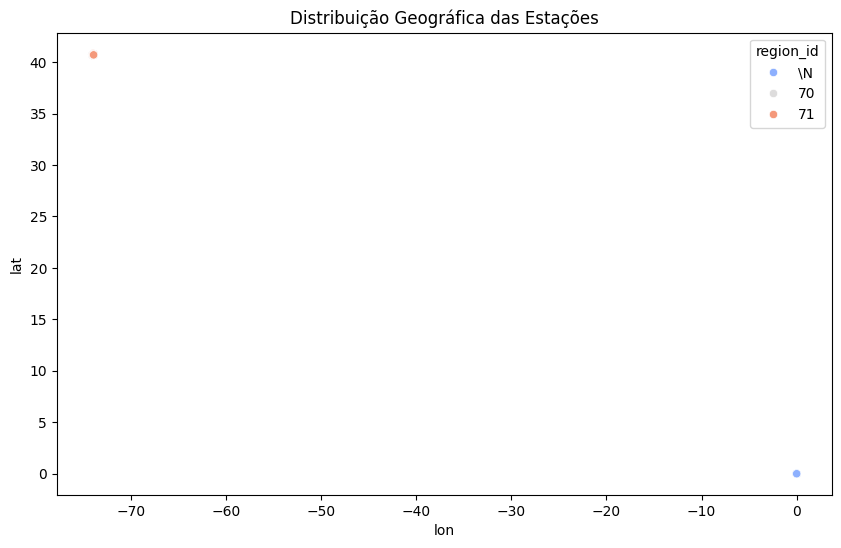

In [18]:
# Gráfico de dispersão para ver a localização das estações
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lon', y='lat', data=df, hue='region_id', palette='coolwarm')
plt.title('Distribuição Geográfica das Estações')
plt.show()

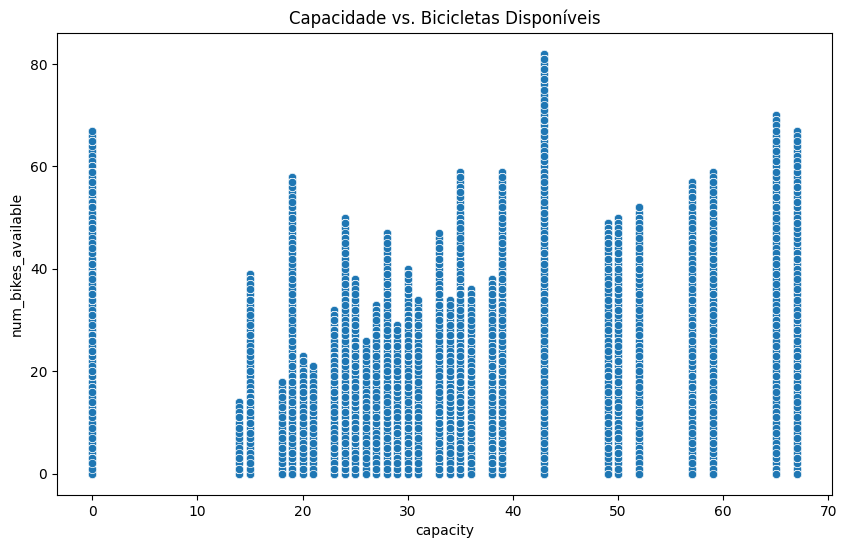

In [19]:
# Gráfico de dispersão entre capacidade e bicicletas disponíveis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='capacity', y='num_bikes_available', data=df)
plt.title('Capacidade vs. Bicicletas Disponíveis')
plt.show()

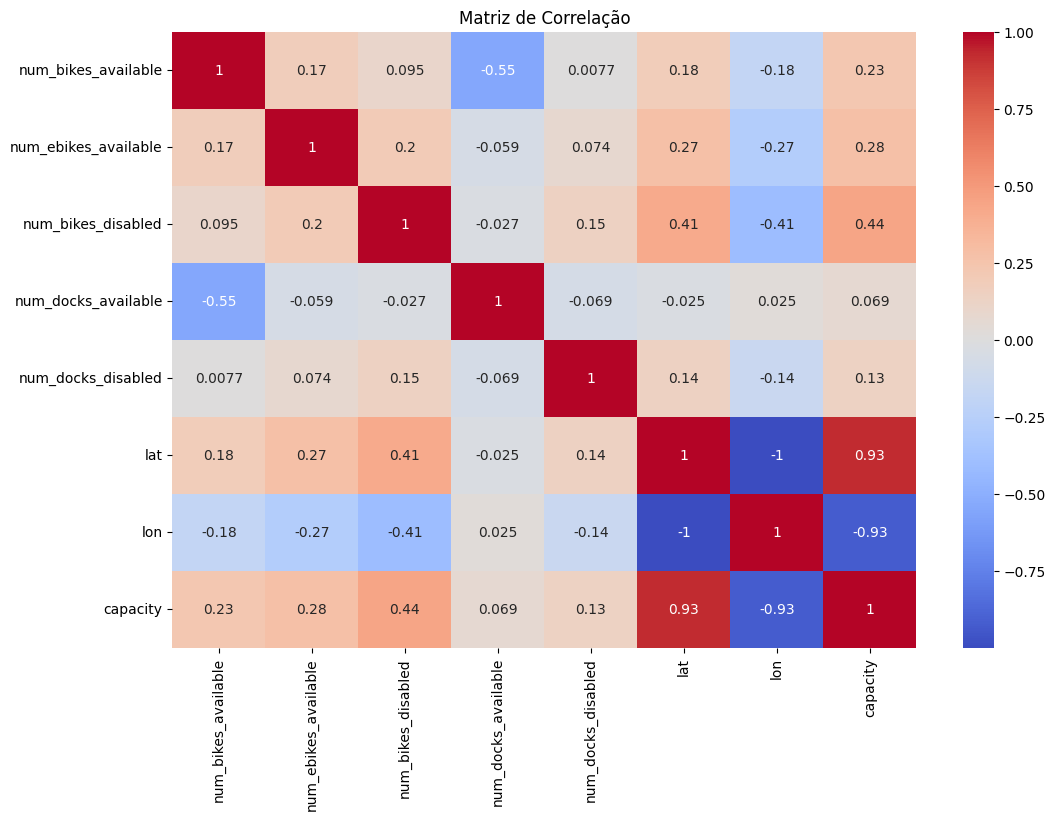

In [22]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
# Selecionar apenas colunas numéricas
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

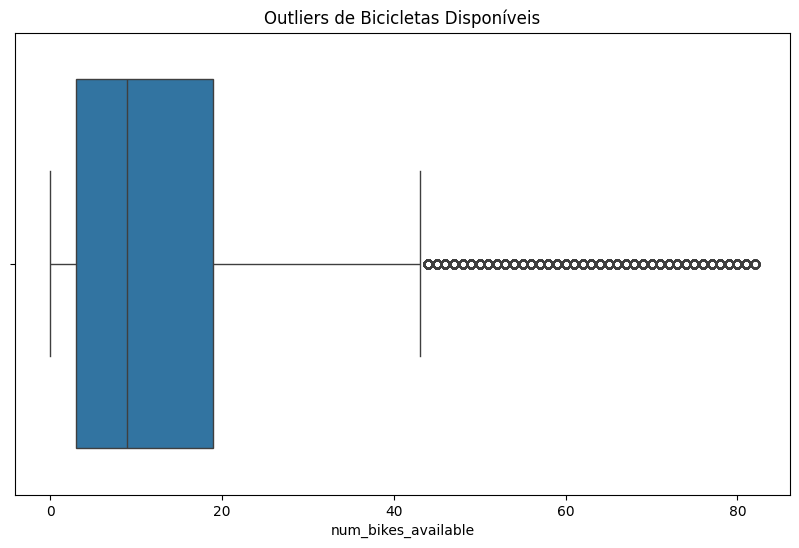

In [23]:
# Boxplot para detectar outliers em 'num_bikes_available'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='num_bikes_available')
plt.title('Outliers de Bicicletas Disponíveis')
plt.show()

In [25]:
# Filtrar apenas colunas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular média
media = df_numeric.mean()

# Calcular mediana
mediana = df_numeric.median()

# Calcular moda
moda = df_numeric.mode().iloc[0]  # A moda pode ter múltiplos valores, pegamos o primeiro

# Exibir os resultados
print("Média:\n", media)
print("\nMediana:\n", mediana)
print("\nModa:\n", moda)

Média:
 num_bikes_available     12.372478
num_ebikes_available     0.189299
num_bikes_disabled       0.339908
num_docks_available     17.730341
num_docks_disabled       0.097119
lat                      7.607545
lon                    -13.817932
capacity                 6.339638
dtype: float64

Mediana:
 num_bikes_available      9.0
num_ebikes_available     0.0
num_bikes_disabled       0.0
num_docks_available     16.0
num_docks_disabled       0.0
lat                      0.0
lon                      0.0
capacity                 0.0
dtype: float64

Moda:
 num_bikes_available     0.0
num_ebikes_available    0.0
num_bikes_disabled      0.0
num_docks_available     0.0
num_docks_disabled      0.0
lat                     0.0
lon                     0.0
capacity                0.0
Name: 0, dtype: float64


In [28]:
# Filtrar apenas colunas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular medidas de dispersão
desvio_padrao = df_numeric.std()
variancia = df_numeric.var()

# Exibir resultados
print("Média:\n", media)
print("\nMediana:\n", mediana)
print("\nModa:\n", moda)
print("\nDesvio Padrão:\n", desvio_padrao)
print("\nVariância:\n", variancia)

Média:
 num_bikes_available     12.372478
num_ebikes_available     0.189299
num_bikes_disabled       0.339908
num_docks_available     17.730341
num_docks_disabled       0.097119
lat                      7.607545
lon                    -13.817932
capacity                 6.339638
dtype: float64

Mediana:
 num_bikes_available      9.0
num_ebikes_available     0.0
num_bikes_disabled       0.0
num_docks_available     16.0
num_docks_disabled       0.0
lat                      0.0
lon                      0.0
capacity                 0.0
dtype: float64

Moda:
 num_bikes_available     0.0
num_ebikes_available    0.0
num_bikes_disabled      0.0
num_docks_available     0.0
num_docks_disabled      0.0
lat                     0.0
lon                     0.0
capacity                0.0
Name: 0, dtype: float64

Desvio Padrão:
 num_bikes_available     11.194750
num_ebikes_available     0.973010
num_bikes_disabled       1.387602
num_docks_available     12.695175
num_docks_disabled       1.344570
lat 

In [29]:
# Analisar distribuição e frequência para a coluna 'num_bikes_available'
frequencia = df['num_bikes_available'].value_counts()
distribuicao = df['num_bikes_available'].describe()  # Estatísticas descritivas

# Exibir resultados
print("Frequência:\n", frequencia)
print("\nDistribuição:\n", distribuicao)

Frequência:
 num_bikes_available
0     2744038
1     2339005
2     2091153
3     1897506
4     1744016
       ...   
71       1424
80       1378
70       1359
81        602
82         95
Name: count, Length: 83, dtype: int64

Distribuição:
 count    3.503909e+07
mean     1.237248e+01
std      1.119475e+01
min      0.000000e+00
25%      3.000000e+00
50%      9.000000e+00
75%      1.900000e+01
max      8.200000e+01
Name: num_bikes_available, dtype: float64
